In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

In [51]:
#download the data from finance
import yfinance as yf

In [ ]:
#start='2010-01-01'
#end='2021-01-01'

#ticker='AAPL'
#df=yf.download(ticker,start,end,interval='1d')
#df.to_csv('C:/Users/13003/Documents/Python Scripts/data/{}.csv'.format(ticker))

In [41]:
data_filename='C:/Users/13003/Documents/Python Scripts/data/{}.csv'.format(ticker)

In [2]:
df=pd.read_csv(data_filename)

In [3]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df1=df.reset_index()['close']

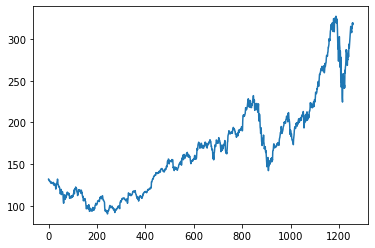

In [7]:
plt.plot(df1)

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(817, 441)

In [18]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [19]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [28]:
X_train.shape, y_train.shape

((716, 100), (716,))

In [29]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
### Create the Stacked LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 464ms/step - loss: 0.0157 - val_loss: 0.0652
Epoch 2/100
12/12 [==============================] - 2s 177ms/step - loss: 0.0033 - val_loss: 0.0051
Epoch 3/100
12/12 [==============================] - 2s 177ms/step - loss: 9.5150e-04 - val_loss: 0.0040
Epoch 4/100
12/12 [==============================] - 2s 183ms/step - loss: 7.8079e-04 - val_loss: 0.0057
Epoch 5/100
12/12 [==============================] - 2s 189ms/step - loss: 6.6475e-04 - val_loss: 0.0076
Epoch 6/100
12/12 [==============================] - 2s 183ms/step - loss: 6.4531e-04 - val_loss: 0.0059
Epoch 7/100
12/12 [==============================] - 2s 188ms/step - loss: 6.5737e-04 - val_loss: 0.0049
Epoch 8/100
12/12 [==============================] - 2s 177ms/step - loss: 6.1332e-04 - val_loss: 0.0054
Epoch 9/100
12/12 [==============================] - 2s 180ms/step - loss: 6.0079e-04 - val_loss: 0.0040
Epoch 10/100
12/12 [==============================] - 2s 183ms/

12/12 [==============================] - 3s 214ms/step - loss: 2.2360e-04 - val_loss: 0.0013
Epoch 79/100
12/12 [==============================] - 3s 227ms/step - loss: 2.3375e-04 - val_loss: 0.0015
Epoch 80/100
12/12 [==============================] - 2s 205ms/step - loss: 2.8485e-04 - val_loss: 0.0012
Epoch 81/100
12/12 [==============================] - 2s 178ms/step - loss: 2.0268e-04 - val_loss: 0.0012
Epoch 82/100
12/12 [==============================] - 2s 182ms/step - loss: 2.1214e-04 - val_loss: 0.0012
Epoch 83/100
12/12 [==============================] - 2s 177ms/step - loss: 2.0527e-04 - val_loss: 0.0011
Epoch 84/100
12/12 [==============================] - 2s 175ms/step - loss: 2.0050e-04 - val_loss: 0.0011
Epoch 85/100
12/12 [==============================] - 2s 178ms/step - loss: 2.1153e-04 - val_loss: 0.0015
Epoch 86/100
12/12 [==============================] - 2s 184ms/step - loss: 2.5035e-04 - val_loss: 0.0017
Epoch 87/100
12/12 [==============================] - 2s 20

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [37]:
math.sqrt(mean_squared_error(y_train,train_predict))

141.48893793828387

In [38]:
math.sqrt(mean_squared_error(ytest,test_predict))

237.15508414614487

In [40]:
#Use the kalman_filter to process the data
import src.kalman_filter as kalman_filter
import src.yahoo_financedata as yahoo_financedata


In [50]:
dataReader = yahoo_financedata.YahooFinanceData()
dataReader.open_data(data_filename)

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

In [ ]:
# init kalman filter
x = np.full((2, 1), 2)
P = np.full((2, 2), 2 ** 2)
state = kalman_filter.State(x, P)

Q = np.full((2, 2), 1 ** 2)
F = np.array([[1, 1],
              [0, 1]])
R = np.array([[0.5 ** 2]])
H = np.array([[1, 0]])

In [ ]:
# data for plotting
gt = {'price': [], 'trend': []}
result = {'price': [], 'trend': []}
velocity = []

counter = 0

while dataReader.has_more_data():
    z = dataReader.next_measurement()

    if counter == 0:
        x = np.array([[z[0][0]], [0]])
        state = kalman_filter.State(x, P)

    prior = kalman_filter.predict(state, F, Q)
    posterior = kalman_filter.update(prior, z, R, H)
    state = posterior

    gt['price'].append(z[0][0])
    result['price'].append(prior.X[0][0])
    velocity.append(prior.X[1][0])

    if counter == 0:
        gt['trend'].append(1)
        result['trend'].append(1)
    else:
        predicted_trend = 1 if prior.X[0][0] > result['price'][counter - 1] else -1
        result['trend'].append(predicted_trend)
        gt_trend = 1 if z[0][0] > gt['price'][counter - 1] else -1
        gt['trend'].append(gt_trend)

    counter += 1

In [ ]:
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X1_train, y1_train = create_dataset(train_data, time_step)
X1_test, y1_test = create_dataset(test_data, time_step)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X1_train =X1_train.reshape(X1_train.shape[0],X1_train.shape[1] , 1)
X1_test = X1_test.reshape(X1_test.shape[0],X1_test.shape[1] , 1)

In [ ]:
model_with_kalman.fit(X1_train,y1_train,validation_data=(X1_test,y1test),epochs=100,batch_size=64,verbose=1)

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model_with_kalman.predict(X1_train)
test_predict=model_with_kalman.predict(X1_test)


##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))